In [1]:
!pip install wordcloud
!pip install pandas

In [74]:
import nltk
import re
from nltk.corpus import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize 
import sys

In [75]:
corpus_root=r'C:\Users\kimyujin\Desktop\2020 3-2학기\인공지능\sentence_tokenized'
gniCorpus=PlaintextCorpusReader(corpus_root,'.*\.txt',encoding='utf-8')

In [76]:
year=input('워드클라우드를 생성할 연도를 적어주세요. EX]2011 \n:')

워드클라우드를 생성할 연도를 적어주세요. EX]2011 
:2018


In [77]:
YEAR=str(int(year)-2002)

if(YEAR>='10'):
    li=[]
    for i in range(0,len(gniCorpus.fileids())):
        if((gniCorpus.fileids()[i][4:6])==YEAR):
                li.append(gniCorpus.fileids()[i])

In [78]:
gniRaw=gniCorpus.raw(li)

In [79]:
plus_stopwords_to_remove = ['\\n','sample', '\n\n', 'n', 'Fig','number','study','analysis', '\\', 'Title:','result','Title','using','used','Table','based'] #왜 Fig, Title이 반영이 안될까
STOPWORDS = STOPWORDS.union(set(plus_stopwords_to_remove))
stopwords_made = set(STOPWORDS)
#print(stopwords_made)
text = gniRaw
keyword_list=[]
searchKwd=''

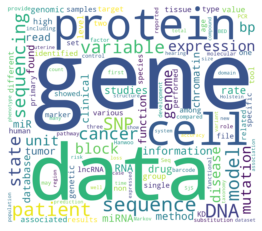

In [91]:
def showingWordcloud():
    global keyword_list
    wordcloud = WordCloud(
                    width = 1600, height = 1400,
                    background_color='white',
                    max_words=400,
                    collocations=False,
                    stopwords = stopwords_made, 
                    min_font_size = 30,
                    #mask = gni_mask
                    ).generate(gniRaw)

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

    plt.show()
    keyword_list=list(wordcloud.words_.items())


In [92]:
def appearWord():
    global searchKwd
    print(year+'년 G&I논문에 가장 많이 등장한 단어 20개는 다음과 같아요!\n')

    Ranklist = ['Rank '+str(n+1) for n in range(20)]
    KeynManylist = []
    for i in range(0,20):
            KeynManylist.append([keyword_list[i][0],round(keyword_list[i][1],3)])

    df = pd.DataFrame(data = np.array(KeynManylist),
                      index = Ranklist, 
                      columns = ['키워드', '빈도']  )

    display(df)
    searchKwd=input('[키워드로 논문찾기]\n'+'위의 20개 중 원하는 키워드를 입력하세요! '+year+'년의 논문 중 키워드를 언급한 논문들을 찾아줄게요. ex) RNA \n찾고싶은 키워드가 없다면 없음 이라고 입력해주세요.\n')

In [85]:
findList=[]

In [86]:
def make_clickable(val):
       return '<a href="{}">{}</a>'.format(val, val)

In [87]:
def findSentence():
    global searchKwd
    a=0
    global findList
    findList=[]
    
    for k in range(0,20):
        if(searchKwd in keyword_list[k][0]):
            a+=1
            break
            
    if a==1:       
        for i in range(0,len(li)):
            globals()['rawFor{}'.format(i)]=gniCorpus.raw(li[i])
            if searchKwd in globals()['rawFor{}'.format(i)]:
                rawfile=globals()['rawFor{}'.format(i)]
                findkeySent=sent_tokenize(rawfile)
                #print(findkeySent)
                paperTitle = (((findkeySent[0].split('Title: '))[1]).split('\n\n'))[0]
                if(year=='2018'): #연도별로 url 형식 다름 하하,, 
                    findList.append(dict(논문명=paperTitle,등장횟수=rawfile.count(searchKwd),url='https://genominfo.org/upload/pdf/'+'gi-'+year+'-'+(li[i].split('.txt')[0]).split('gni-')[1]+'.pdf'))
        print("<< "+searchKwd+'가(이) 언급된 논문 목록은 다음과 같습니다.>>')
        
        
        
             
    else:
        searchKwd=input('키워드 입력이 올바르지 않아요. 위의 20개 중에서 다시 입력해주세요.\n')
        findSentence()


In [88]:
if(searchKwd=='없음'):
    print('홈으로 돌아가기')
    sys.exit(1)
    
else:
    findSentence()  
    
df = pd.DataFrame(findList,index=[x for x in range(1,len(findList)+1)])
finalshowing=df.style.format({'url': make_clickable}).bar(subset=['등장횟수'], color='#d65f5f')
finalshowing

홈으로 돌아가기


SystemExit: 1

C:\Users\kimyujin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
